In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import glob
import cv2
current_dir = os.getcwd() 

data = current_dir + '/Data/'
audio_dir = data + '/Raw_Audios/'
spectrogram_dir = data + '/Spectrograms/'
labeled_data_dir = data + '/Labeled_Data/'

## Class "Audio"

### 1. import audio 

In [2]:
from src.audio import Audio

audio_filenames = glob.glob(audio_dir + '*')

audio = Audio.load(audio_filenames[10])
print('audio sample rate:', audio.sample_rate)
print('audio length of seconds:', audio.duration())


audio sample rate: 22050
audio length of seconds: 60.0


In [3]:
audio_trimmed = audio.trim(start_time = 2, end_time = 6)
print('audio sample rate:', audio_trimmed.sample_rate)
print('audio length of seconds:', audio_trimmed.duration())

audio sample rate: 22050
audio length of seconds: 4.0


### 2. Plot spectrograms and spectrograms

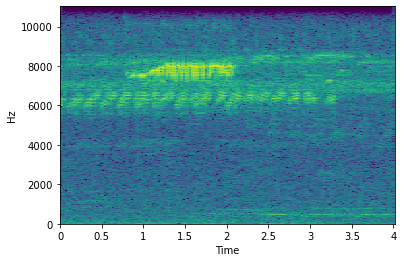

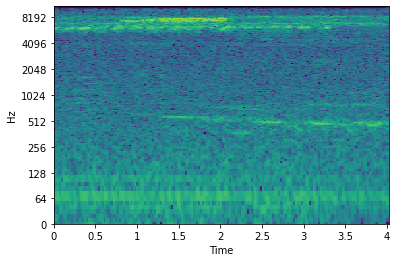

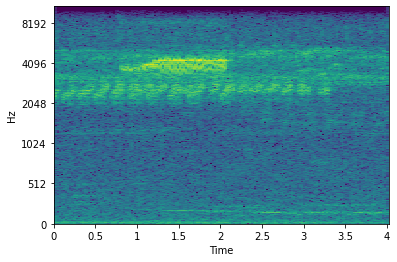

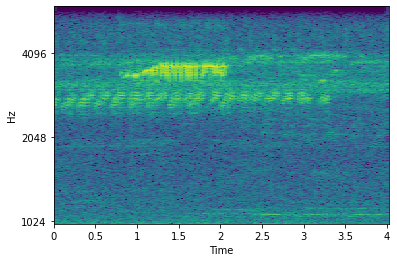

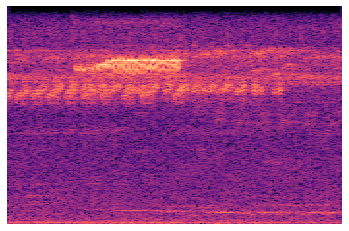

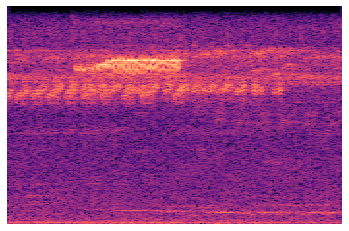

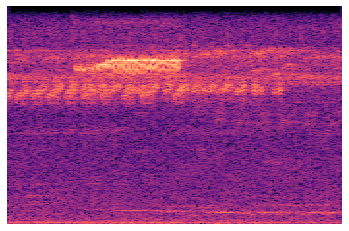

In [6]:
audio_trimmed.generate_spectrogram(axis = True, sr = 22050, hop_length=512, fmin=None, fmax=None, x_axis='time', y_axis='linear', cmap = 'viridis')
audio_trimmed.generate_spectrogram(axis = True, sr = 22050, hop_length=512, fmin=None, fmax=None, x_axis='time', y_axis='log', cmap = 'viridis')
audio_trimmed.generate_spectrogram(axis = True, sr = 22050, hop_length=512, fmin=None, fmax=None, x_axis='time', y_axis='mel', cmap = 'viridis')
audio_trimmed.generate_spectrogram(axis = True, sr = 22050, hop_length=512, fmin=1000, fmax=6000, x_axis='time', y_axis='mel', cmap = 'viridis')
audio_trimmed.generate_spectrogram(axis = False, sr = 22050, hop_length=512, fmin=None, fmax=None, x_axis='time', y_axis='mel', cmap = 'magma')
audio_trimmed.generate_spectrogram(axis = False, sr = 22050, hop_length=128, fmin=None, fmax=None, x_axis='time', y_axis='mel', cmap = 'magma')
audio_trimmed.generate_spectrogram(axis = False, sr = 1000, hop_length=512, fmin=None, fmax=None, x_axis='time', y_axis='mel', cmap = 'magma')


### 3. save spectrograms

In [11]:
audio_trimmed.generate_spectrogram(axis = False, sr = 1000, hop_length=512, fmin=None, fmax=None, x_axis='time', y_axis='mel', cmap = 'magma', filename = spectrogram_dir + 'sample_spectrogram.png')

## Class 'Labeled_Data'

### 1. load labeled_data

In [11]:
from src.labeled_data import Labeled_Data

labeled_data_filenames = glob.glob(labeled_data_dir + '*')
labeled_data = Labeled_Data.load(filenames = labeled_data_filenames)
labeled_data

,Begin Time (s),End Time (s),Low Freq (Hz),High Freq (Hz),Begin File,Category
0,35.338667,36.432000,2718.75,4781.25,project_1209_site_3121_2018_4_5ADE22D4.flac,4809
1,29.061333,30.154667,2718.75,4781.25,project_1209_site_3129_2018_4_5AD6E266.flac,4809
2,48.720000,49.813333,2718.75,4781.25,project_1209_site_3134_2018_4_5AD70910.flac,4809
3,43.248000,44.341333,2718.75,4781.25,project_1209_site_3128_2018_4_5ADE1F48.flac,4809
4,41.648000,42.741333,2718.75,4781.25,project_1209_site_3096_2018_4_5AD78F4E.flac,4809
5,53.861333,56.314667,1218.75,3750.00,project_1209_site_3094_2018_4_5ADED92C.flac,5161
6,11.312000,13.765333,1218.75,3750.00,project_1209_site_3103_2018_4_5AD83863.flac,5161
7,8.176000,10.629333,1218.75,3750.00,project_1209_site_3109_2018_4_5AD444D9.flac,5161
8,16.272000,18.725333,1218.75,3750.00,project_1209_site_3111_2018_4_5AD6E229.flac,5161
9,0.293333,2.746667,1218.75,3750.00,project_1209_site_3107_2018_4_5ADED6AD.flac,5161


## Class 'Spectrogram'

### 1. generate spectrograms

In [11]:
from datetime import datetime
begin = datetime.now()

from src.spectrogram import Spectrogram

labeled_data_filenames = glob.glob(labeled_data_dir + '*')
audio_filenames = glob.glob(audio_dir + '*')

Spectrogram.generate_spectrograms(spectrogram_duration = 10, labeled_data_filenames = labeled_data_filenames, audio_filenames = audio_filenames, save_to_dir = spectrogram_dir) 


end = datetime.now()
print('Time spent to generate spectrograms without parallelization: ', (end - begin).total_seconds(), 'seconds')

Time spent to generate spectrograms without parallelization:  49.357478 seconds


In [12]:
from datetime import datetime
begin = datetime.now()

from src.spectrogram import Spectrogram

labeled_data_filenames = glob.glob(labeled_data_dir + '*')
audio_filenames = glob.glob(audio_dir + '*')

Spectrogram.generate_spectrograms_parallel(spectrogram_duration = 10, labeled_data_filenames = labeled_data_filenames, audio_filenames = audio_filenames, save_to_dir = spectrogram_dir) 

end = datetime.now()
print('Time spent to generate spectrograms with parallelization: ', (end - begin).total_seconds(), 'seconds')

Time spent to generate spectrograms with parallelization:  5.771526 seconds


### 2. load spectrograms

In [12]:
from src.spectrogram import Spectrogram

specctrogram_vector, spectrogarm_filenames = Spectrogram.load_spectrograms(spectrogram_dir=spectrogram_dir, shape=(224, 224))
print('shape of vector for all valid spectrograms:', specctrogram_vector.shape)
print('number of all valid spectrograms:', len(spectrogarm_filenames))

shape of vector for all valid spectrograms: (20, 224, 224, 3)
number of all valid spectrograms: 20
